[[-0.67535533 -0.95626482]
 [ 0.50357444  0.27825672]
 [ 0.49181512  0.63461849]]
(200, 1)
(100, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.


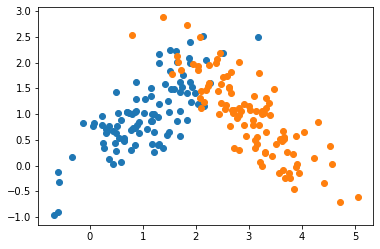

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# generate gaussian toy data
np.random.seed(101)

d = 2
n = 100
mu1 = [1, 1]
mu2 = [3, 1]
sigma_diag = 0.4
c = 0.5
cov1 = [[sigma_diag, c], [c, sigma_diag]]
cov2 = [[sigma_diag, -c], [-c, sigma_diag]]

X1 = np.random.multivariate_normal(mu1, cov1, size=n)
X2 = np.random.multivariate_normal(mu2, cov2, size=n)
Y1 = np.full((n,1), 1)
Y2 = np.full((n,1), 0)
# X = np.concatenate((np.full((2*n,1), 1), np.concatenate((X1, X2), axis=0)), axis=1)
X =  np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)
print(X[0:3])
print(Y.shape)

print(Y1.shape)

plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [40]:
def P_Z_given_X_thetas(X, p_z_prior, mu_z, cov_z):    
    post_z_list = []
    normalizing_const = 0
    for k in range(mu_z.shape[1]):
        X_centered = X - mu_z[k]
        post_z_unnorm_list = []
        # iterate over samples
        for i in range(X.shape[0]):
            post_z_unnorm_list.append(np.exp(-0.5*(X_centered[i]) @ np.linalg.inv(cov_z[k]) @ (X_centered[i]).T) + np.log(p_z_prior[k]))
        # print(np.array(post_z_unnorm).shape)
        post_z_unnorm = np.array(post_z_unnorm_list)
        normalizing_const += np.nansum(post_z_unnorm)
        post_z_list.append(post_z_unnorm)
    post_z = np.array(post_z_list).reshape((X.shape[0], mu_z.shape[1]))/normalizing_const # Shape (n_x, n_z) 
    return post_z 

def M_step(X, post_z):
    N = X.shape[0]
    p_z_sum_k = np.nansum(post_z, axis=0)
    p_z_sum = np.nansum(p_z_sum_k)
    # print("p_z_sum =", p_z_sum)
    p_z_prior = (p_z_sum_k/p_z_sum).reshape(-1, 1)
    cov_z = []
    mu_z = []
    for k in range(post_z.shape[1]):
        mu_k = (post_z[:,k].T @ X)/p_z_sum_k[k]
        X_centered = X - mu_k[k]
        cov_x = (X_centered.T @ X_centered)
        # print("cov_x =", cov_x.shape)
        cov_x_weighted_sum = cov_x * 0
        for i in range(N):
            cov_x_weighted_sum += post_z[i,k] * cov_x
        cov_z.append(cov_x_weighted_sum/p_z_sum_k[k])
        mu_z.append(mu_k)
    return p_z_prior, np.array(mu_z), np.array(cov_z)

var_z = 1.0
cor_z = 0.1
p_z_prior, mu_z, cov_z = np.array([[0.5], [0.5]]), np.array([[0.0, 0.0], [3.0, 3.0]]), np.array([[[var_z, cor_z], [cor_z, var_z]], [[var_z, cor_z], [cor_z, var_z]]])
for _ in range(100):
    # print("X.shape=", X.shape); 
    print("p_z_prior=",p_z_prior); print("mu_z=",mu_z); print("cov_z[0]=",cov_z.shape)

    # E-Step
    post_z = P_Z_given_X_thetas(X, p_z_prior, mu_z, cov_z)
    print("post_z=", post_z.shape)
    # M-Step
    p_z_prior, mu_z, cov_z = M_step(X, post_z)

p_z_prior= [[0.5]
 [0.5]]
mu_z= [[0. 0.]
 [3. 3.]]
cov_z[0]= (2, 2, 2)
post_z= (200, 2)
p_z_prior= [[0.48575078]
 [0.51424922]]
mu_z= [[2.08168835 0.97968841]
 [2.10234746 1.00038175]]
cov_z[0]= (2, 2, 2)
post_z= (200, 2)
p_z_prior= [[0.49990055]
 [0.50009945]]
mu_z= [[2.11990995 0.98439876]
 [2.12024377 0.98325716]]
cov_z[0]= (2, 2, 2)
post_z= (200, 2)
p_z_prior= [[0.4999094]
 [0.5000906]]
mu_z= [[2.02929307 0.98561993]
 [2.02970408 0.98449993]]
cov_z[0]= (2, 2, 2)
post_z= (200, 2)
p_z_prior= [[0.49989367]
 [0.50010633]]
mu_z= [[2.02948658 0.98563079]
 [2.02973766 0.98447586]]
cov_z[0]= (2, 2, 2)
post_z= (200, 2)
p_z_prior= [[0.49989372]
 [0.50010628]]
mu_z= [[2.02958664 0.98562935]
 [2.02983796 0.98447455]]
cov_z[0]= (2, 2, 2)
post_z= (200, 2)
p_z_prior= [[0.49989374]
 [0.50010626]]
mu_z= [[2.02958604 0.98562934]
 [2.02983754 0.98447458]]
cov_z[0]= (2, 2, 2)
post_z= (200, 2)
p_z_prior= [[0.49989374]
 [0.50010626]]
mu_z= [[2.02958592 0.98562934]
 [2.02983742 0.98447458]]
cov_z[0]= (2,